In [1]:
# ---------------------------------------------------------
# Visualization Tool: plotly, matplotlib, seaborn
#
# Plotly Configuration Instruction: 
# https://plot.ly/python/static-image-export/#new-to-plotly
# ----------------------------------------------------------

In [57]:
# ---------------------------------------------------------
# The plots in Chapter 5 are based on the SAP HANA database
# Due to the data protection and privacy politics, the plots 
# could not be shown here 
# ----------------------------------------------------------

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import plotly
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter, Bar, Layout, Figure, Line, Marker

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
plotly.__version__

'3.3.0'

In [13]:
%matplotlib inline

In [4]:
init_notebook_mode(connected=True)

### Chapter 2

##### Figure 2.1: A Synthetic Time Series with Anomalies

In [5]:
# --------------------------------------------------------------
# Generate a synthetic wave to illustrate the 
# different types of anomalies in a time series
# --------------------------------------------------------------

In [6]:
t = np.arange(0.0, 2.0, 0.01)
noise = np.random.normal(0, 0.1, len(t))
wave = np.sin(2 * 2 * np.pi * t)
wave[55:71] = 0.5 # collective anomaly
wave[114] = 0.5 # point anomaly 
wave[150] = -2 # point anomaly ( & spatial anomaly)

In [7]:
index = range(1,len(wave)+1) # entire time series 
index2 = range(56,72) # collective anomaly
index3 = [115] # point anomaly
index4 = [151] # point anomaly ( & spatial anomaly)

In [8]:
trace1 = Scatter(
    x = index,
    y = wave,
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = Scatter(
    x = index2,
    y = wave[56:71],
    #mode = 'markers',
    marker=Marker(
    color="#28B463",
    size=6,
    symbol='circle'
    ),
)
trace3 = Scatter(
    x = index3,
    y = wave[114:115],
    #mode = 'markers',
    marker=Marker(
    color="#F39C12",
    size=8,
    symbol='circle'
    ),
)
trace4 = Scatter(
    x = index4,
    y = wave[150:151],
    #mode = 'markers',
    marker=Marker(
    color="#C0392B",
    size=8,
    symbol='circle'
    ),
)
data = [trace1, trace2,trace3,trace4]
layout = Layout(
    #title='CPU Utilization of Web-Service Amazon Elastic Compute Cloud (EC2)',
    titlefont = dict(size = 15),
    xaxis = dict(
        title = 'Time Stamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Value',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter2/wave_abnormal.pdf')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




### Chapter 3

##### Figure 3.1: Example of System Behaviors Change

In [9]:
# --------------------------------------------------------------
# Generate a synthetic wave to illustrate the 
# phenomenon that the data source is nonstationary 
# and the detector must adapt the the definition of 
# "normality" over time
# --------------------------------------------------------------

In [10]:
t = [3,4,3,2,4,5,4,3,96,95,97,98,96,94,95,96,97]
index = range(1,len(t)+1)

In [11]:
trace1 = Scatter(
    x = index,
    y = t,
    mode = 'lines+markers',
    name = 'lines+markers'
)
data = [trace1]
layout = Layout(
    height=400,
    titlefont = dict(size = 15),
    xaxis = dict(
        title = 'Time Stamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Value',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/novelty.pdf')

##### Figure 3.2: An illustration of the Histogram Approach to Density Estimation

In [23]:
# --------------------------------------------------------------
# Generate an example to illustrate that the histogram
# methods highly depend on bin windths 
# --------------------------------------------------------------

In [14]:
n = 10000 # number of sample to be drawn
mu = [-6, 5,20]
sigma = [2,3,4]
samples = []
for i in range(n): # iteratively draw samples
    Z = np.random.choice([0,1,2]) # latent variable
    samples.append(np.random.normal(mu[Z], sigma[Z], 1))

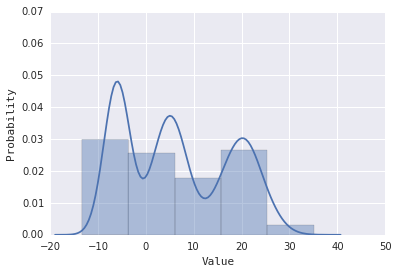

In [15]:
sns.set()
font = {'family': 'monospace',
        }
plt.xlabel('Value', fontdict=font)
plt.ylabel('Probability', fontdict = font)
plt.ylim(0.00,0.07)
hist_1 = sns.distplot(samples, bins = 5)
pp = PdfPages('plots/Chapter3/hist_1.pdf')
plt.savefig(pp, format='pdf')
pp.close()

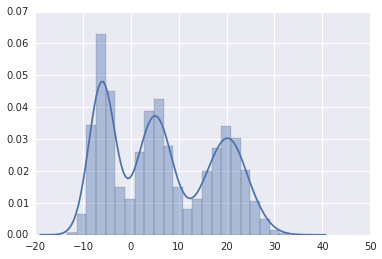

In [16]:
hist_2 = sns.distplot(samples)
pp = PdfPages('plots/Chapter3/gmm.pdf')
plt.savefig(pp, format='pdf')
pp.close()

##### Figure 3.3: Logarithmic Loss as Anomaly Score

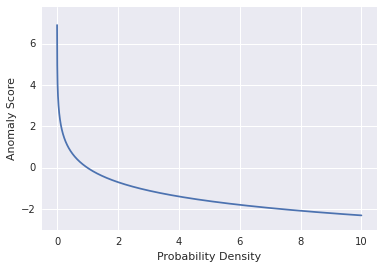

In [22]:
p = np.linspace(0.001,10,10000).tolist()
sns.set()
fig, ax = plt.subplots()
#font = {'family': 'monospace'}
plt.xlabel('Probability Density')
plt.ylabel('Anomaly Score')
plt.ylim(-3,7.8)
plt.xlim(-0.5,10.5)
plt.plot(p, -np.log(p))

pp = PdfPages('plots/Chapter3/logloss.pdf')
plt.savefig(pp, format='pdf')
pp.close()

##### Figure 3.4: CPU Utilization of One Instance in the AWS

In [30]:
ts = pd.read_csv('anomalyDetection/results/opuad_ec2_cpu_utilization_5f5533.csv', parse_dates=['timestamp']) # stream
labels = [pd.to_datetime("2014-02-24 18:37:00"), pd.to_datetime("2014-02-24 21:57:00")] # true positive anomalies 
start = pd.to_datetime('2014-02-23 12:00:00')
end = pd.to_datetime('2014-02-26 12:00:00')

mask = ((ts["timestamp"] >= start) &
        (ts["timestamp"] <= end))

trace1 = Scatter(x=ts["timestamp"][mask],
                   y=ts["value"][mask],
                   name="value",
                   line=Line(
                     width=1.5,
                     color = 'rgb(0,146,199)'
                   ),
                   showlegend=False) 


anomalys = ts.loc[ts['timestamp'].isin(labels)]
anomalys = anomalys[mask]

trace2 = Scatter(
              x = anomalys.timestamp,
              y = anomalys.value,
              name = 'Grund Truth Anomaly',
              mode = 'markers',
              text=["Anomalous Instance"],
              marker=Marker(
                  color="rgb(200, 20, 20)",
                  size=10,
                  symbol='circle'
              ),
              yaxis = 'y1'
          )

data = [trace1, trace2]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='CPU Utilization Percentage(%)',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/cpu_amazon.pdf')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [34]:
trace3 = Scatter(x=ts["timestamp"][mask],
                   y=ts["raw_score"][mask],
                   name="raw_score",
                   line=Line(
                     width=1.5,
                     color = '#E67E22'
                   ),
                   showlegend=True) 
data = [trace3]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Anomaly Score',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/cpu_amazon_score.pdf')

##### Figure 3.5: Disk Write Bytes of One Instance in the AWS

In [36]:
ts = pd.read_csv('anomalyDetection/results/opuad_ec2_disk_write_bytes_1ef3de.csv', parse_dates=['timestamp']) # stream
labels = [pd.to_datetime("2014-03-10 21:09:00")]

start = pd.to_datetime('2014-03-05 04:00:00')
end = pd.to_datetime('2014-03-15 14:00:00')

mask = ((ts["timestamp"] >= start) &
        (ts["timestamp"] <= end))

trace1 = Scatter(x=ts["timestamp"][mask],
                   y=ts["value"][mask],
                   name="value",
                   line=Line(
                     width=1.5,
                     color = 'rgb(0,146,199)'
                   ),
                   showlegend=False) 


anomalys = ts.loc[ts['timestamp'].isin(labels)]
anomalys = anomalys[mask]

trace2 = Scatter(
              x = anomalys.timestamp,
              y = anomalys.value,
              name = 'Grund Truth Anomaly',
              mode = 'markers',
              text=["Anomalous Instance"],
              marker=Marker(
                  color="rgb(200, 20, 20)",
                  size=10,
                  symbol='circle'
              ),
              yaxis = 'y1'
          )

data = [trace1, trace2]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Disk Write Bytes',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/disk_amazon.pdf')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [38]:
trace3 = Scatter(x=ts["timestamp"][mask],
                   y=ts["raw_score"][mask],
                   name="raw_score",
                   line=Line(
                     width=1.5,
                     color = '#E67E22'
                   ),
                   showlegend=True) 
data = [trace3]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Anomaly Score',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/disk_amazon_score.pdf')

In [41]:
trace4 = Scatter(x=ts["timestamp"][mask],
                   y=ts["anomaly_score"][mask],
                   name="likelihood",
                   line=Line(
                     width=1.5,
                     color = '#17A589'
                   ),
                   showlegend=True) 
data = [trace4]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Anomaly Likelihood',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/disk_amazon_likelihood.pdf')

##### Figure 3.6: Q Function and Anomaly Likelihood

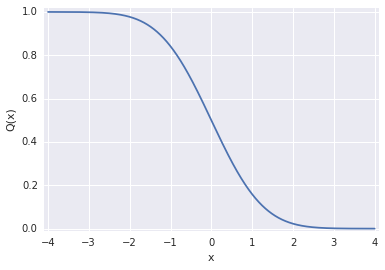

In [44]:
p = np.linspace(-4,4,10000).tolist()
sns.set()
fig, ax = plt.subplots()
#font = {'family': 'monospace'}
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.ylim(-0.01,1.02)
plt.xlim(-4.1,4.1)
plt.plot(p, norm.sf(p))

pp = PdfPages('plots/Chapter3/Q_function.pdf')
plt.savefig(pp, format='pdf')
pp.close()

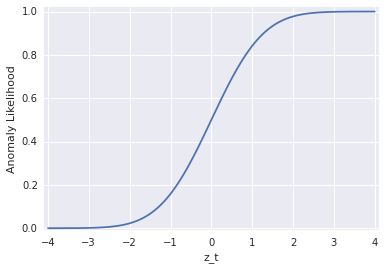

In [45]:
sns.set()
fig, ax = plt.subplots()
#font = {'family': 'monospace'}
plt.xlabel('z_t')
plt.ylabel('Anomaly Likelihood')
plt.ylim(-0.01,1.02)
plt.xlim(-4.1,4.1)
plt.plot(p, 1-norm.sf(p))

pp = PdfPages('plots/Chapter3/Q_function_2.pdf')
plt.savefig(pp, format='pdf')
pp.close()

##### Figure 3.8: Machine Temeprature

In [56]:
ts = pd.read_csv('anomalyDetection/results/opuad_machine_temperature_system_failure.csv', parse_dates=['timestamp']) # stream
labels = [pd.to_datetime("2013-12-11 06:00:00"), pd.to_datetime("2013-12-16 17:25:00"), 
            pd.to_datetime("2014-01-28 13:55:00"), pd.to_datetime("2014-02-08 14:30:00")] # true positive anomalies
windows = [ [
            "2013-12-10 06:25:00.000000",
            "2013-12-12 05:35:00.000000"
        ],
        [
            "2013-12-15 17:50:00.000000",
            "2013-12-17 17:00:00.000000"
        ],
        [
            "2014-01-27 14:20:00.000000",
            "2014-01-29 13:30:00.000000"
        ],
        [
            "2014-02-07 14:55:00.000000",
            "2014-02-09 14:05:00.000000"
        ]] # anomaly windows

start = ts["timestamp"][0]
end = ts["timestamp"].iloc[-1]

mask = ((ts["timestamp"] >= start) &
        (ts["timestamp"] <= end))

trace1 = Scatter(x=ts["timestamp"][mask],
                   y=ts["value"][mask],
                   name="value",
                   line=Line(
                     width=1.5,
                     color = 'rgb(0,146,199)'
                   ),
                   showlegend=False) 

anomalys = ts.loc[ts['timestamp'].isin(labels)]
anomalys = anomalys[mask]

trace2 = Scatter(
              x = anomalys.timestamp,
              y = anomalys.value,
              name = 'Grund Truth Anomaly',
              mode = 'markers',
              text=["Anomalous Instance"],
              marker=Marker(
                  color="rgb(200, 20, 20)",
                  size=10,
                  symbol='circle'
              ),
              yaxis = 'y1'
          )

x = []
delta = (pd.to_datetime(ts["timestamp"].iloc[1]) -
         pd.to_datetime(ts["timestamp"].iloc[0]))
minutes = int(delta.total_seconds() / 60) # calculate the time in two neighboring time points

for window in windows:
    windowStart = max(pd.to_datetime(window[0]), pd.to_datetime(start))
    windowEnd = min(pd.to_datetime(window[1]), pd.to_datetime(end))
    x.extend(pd.date_range(windowStart, windowEnd, freq=str(minutes) + "Min").tolist())

maxVal = ts.value.max()
y = [maxVal for _ in x]

trace3 = Bar(x=x,
    y=y,
    name="Anomaly Window",
    marker=Marker(
        color="rgb(239,192,40)"
    ),
    opacity=0.5)

length = min(int(0.15 * len(ts)), int(0.15 * 5000))
    
x = ts["timestamp"].iloc[:length][mask]
y = [ts.value.max() for _ in x]

trace4 = Bar(x=x,
             y=y,
             name="Probationary Period",
             marker=Marker(
                 color="rgb(0,173,182)"
               ),
               opacity=0.3
          ) 

data = [trace1,trace2, trace3, trace4]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Machine Tempearture',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, 'plots/Chapter3/machine_temp.pdf')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:37: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



##### Figure 3.9: Sigmoidal Scoring Function 

In [46]:
x = np.linspace(-3,3,10000).tolist()
y = [2*(1/(1+np.exp(5*i)))-1 for i in x]

sns.set()
fig, ax = plt.subplots()
#font = {'family': 'monospace'}
plt.xlabel('x')
plt.ylabel('Sigmoidal Score')
plt.ylim(-1.1,1.1)
plt.xlim(-3,3)
plt.plot(x, y)

pp = PdfPages('plots/Chapter3/Sigmoid.pdf')
plt.savefig(pp, format='pdf')
pp.close()

##### Figure 3.10: Detection Results nearby the First Anomaly Window in Figure 3.8

In [63]:
# -----------------------------------------------------------
# In order to illustrate the false positives, the Figure 3.10
# in Chapter 3 has a "fake" false positive after the anomaly 
# window but here it is not shown any more 
# -----------------------------------------------------------

In [61]:
ts = pd.read_csv('anomalyDetection/results/opuad_machine_temperature_system_failure.csv', parse_dates=['timestamp']) # stream
labels = [pd.to_datetime("2013-12-11 06:00:00"), pd.to_datetime("2013-12-16 17:25:00"), 
            pd.to_datetime("2014-01-28 13:55:00"), pd.to_datetime("2014-02-08 14:30:00")] # true positive anomalies
windows = [ [
            "2013-12-10 06:25:00.000000",
            "2013-12-12 05:35:00.000000"
        ],
        [
            "2013-12-15 17:50:00.000000",
            "2013-12-17 17:00:00.000000"
        ],
        [
            "2014-01-27 14:20:00.000000",
            "2014-01-29 13:30:00.000000"
        ],
        [
            "2014-02-07 14:55:00.000000",
            "2014-02-09 14:05:00.000000"
        ]] # anomaly windows

start = ts["timestamp"][0]
end = pd.to_datetime('2013-12-12 23:00:00')

mask = ((ts["timestamp"] >= start) &
        (ts["timestamp"] <= end))

trace1 = Scatter(x=ts["timestamp"][mask],
                   y=ts["value"][mask],
                   name="value",
                   line=Line(
                     width=1.5,
                     color = 'rgb(0,146,199)'
                   ),
                   showlegend=False) 

anomalys = ts.loc[ts['timestamp'].isin(labels)]
anomalys = anomalys[mask]

trace2 = Scatter(
              x = anomalys.timestamp,
              y = anomalys.value,
              name = 'Grund Truth Anomaly',
              mode = 'markers',
              text=["Anomalous Instance"],
              marker=Marker(
                  color="rgb(200, 20, 20)",
                  size=10,
                  symbol='circle'
              ),
              yaxis = 'y1'
          )

x = []
delta = (pd.to_datetime(ts["timestamp"].iloc[1]) -
         pd.to_datetime(ts["timestamp"].iloc[0]))
minutes = int(delta.total_seconds() / 60) # calculate the time in two neighboring time points

for window in windows:
    windowStart = max(pd.to_datetime(window[0]), pd.to_datetime(start))
    windowEnd = min(pd.to_datetime(window[1]), pd.to_datetime(end))
    x.extend(pd.date_range(windowStart, windowEnd, freq=str(minutes) + "Min").tolist())

maxVal = ts.value.max()
y = [maxVal for _ in x]

trace3 = Bar(x=x,
    y=y,
    name="Anomaly Window",
    marker=Marker(
        color="rgb(239,192,40)"
    ),
    opacity=0.5)

length = min(int(0.15 * len(ts)), int(0.15 * 5000))
    
x = ts["timestamp"].iloc[:length][mask]
y = [ts.value.max() for _ in x]

trace4 = Bar(x=x,
             y=y,
             name="Probationary Period",
             marker=Marker(
                 color="rgb(0,173,182)"
               ),
               opacity=0.3
          ) 


threshold = 0.9
anomalys = ts.loc[ts['anomaly_score'] > threshold]

anomalys = anomalys[mask]
 
trace5 = Scatter(
          x = anomalys.timestamp,
          y = anomalys.value,
          name = 'Detection Point',
          mode = 'markers',
          marker=Marker(
              color="#9B59B6",
              size=10,
              symbol="diamond"
          ),
      )

data = [trace1,trace2, trace3, trace4, trace5]
layout = Layout(
    titlefont = dict(size = 15),
    xaxis = dict(
        #title = 'timestamp',
        tickfont = dict(
        size = 13)),
    yaxis=dict(
        title='Machine Tempearture',
        tickfont = dict(
        size = 13)),
    legend=dict(
        orientation="h",
        x = 0,
        y = -0.2,
        font = dict(size = 12)))
fig = Figure(data=data, layout=layout)
iplot(fig)
#pio.write_image(fig, 'plots/Chapter3/machine_temp.pdf')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:37: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:92: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

